<a href="https://colab.research.google.com/github/rodrigosimoncalaca/projectDataScience/blob/master/GamersCLub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://www.rumo.com.br/lojas/00036391/images/20200310/logo.png" height="220px"></center>


# Analisando Dados da Gamers Club - Teste Prático

Esse teste prático consiste em:
* Analisar os datasets ofertados
* Pontos importantes encontrados no dataset e tendências identificadas;
* Correlações observadas;
* Fazer ao menos uma sugestão de como poderiam explorar este nicho - isso é, gerar valor através de dados;


## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do banco de dados disponibilizados pela empresa

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `matchmaking_stats_summary` - *tabela que compõe todos os dados do jogador no modo ranqueado.*

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("/content/matchmaking_stats_summary.csv")


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


In [5]:
# Executar para mostrar as 5 primeiras linhas, e entendermos a estrutura para montar um dicionário das variáveis
df.head()

,id,player_id,matches_played,total_wins,total_loss,mm_points,assist,death,hs,kills,is_mm,created_at,updated_at
0,1,354985,1,1,0,3,5,13,6,13,0,2020-02-01 00:47:32.0,2020-02-01 00:47:32.0
1,2,152268,1,0,1,-1,3,20,2,15,0,2020-02-01 00:54:01.0,2020-02-01 00:54:01.0
2,3,679247,1,0,1,-1,5,23,4,7,0,2020-02-01 01:00:31.0,2020-02-01 01:00:31.0
3,4,604607,1,0,1,-1,3,21,8,11,0,2020-02-01 01:03:02.0,2020-02-01 01:03:02.0
4,5,325203,1,1,0,3,2,13,11,21,0,2020-02-01 01:04:02.0,2020-02-01 01:04:02.0


**Dicionário das variáveis**

* *player_id*: identificação do jogador
* *matches_played*: quantidade de partidas jogadas
* *total_wins*: quantidade de vitórias
* *total_loss*: quantidade de derrotas
* *mm_points*: saldo de pontos
* *kills*: total de abates
* *death*: total de mortes
* *assist*: total de assistências
* *hs*: quantidade de tiros na cabeça
* *created_at*: data de criação do registro
* *updated_at*: data de última atualização do registro
* *is_mm*: campo boleano


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.


In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos das variáveis
display(df.dtypes)

Entradas:	 2057
Variáveis:	 13



id                 int64
player_id          int64
matches_played     int64
total_wins         int64
total_loss         int64
mm_points          int64
assist             int64
death              int64
hs                 int64
kills              int64
is_mm              int64
created_at        object
updated_at        object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [8]:
# ordenar em ordem decrescente as variáveis pela porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100

updated_at        0.0
created_at        0.0
is_mm             0.0
kills             0.0
hs                0.0
death             0.0
assist            0.0
mm_points         0.0
total_loss        0.0
total_wins        0.0
matches_played    0.0
player_id         0.0
id                0.0
dtype: float64


* É possível ver que não temos nenhuma coluna com valores faltantes 

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma, que tem como objetivo mostrar a distribuição de frequências de dados obtidos por medições, para identificarmos a frequência com que algo acontece.

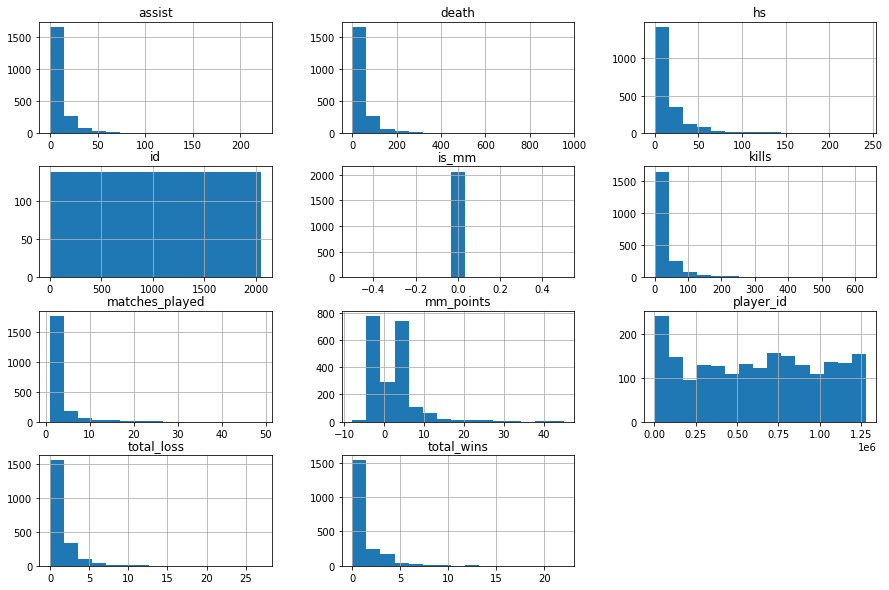

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar que pode haver indícios da presença de *outliers*.
Olhe por exemplo a variável *death*.

 **- Aspectos de outliers:**

  * Os outliers podem impactar negativamente todo o resultado de uma análise;
  * O comportamento dos outliers pode ser justamente o que está sendo procurado.

Mas para nos auxiliar nessa verificação há duas maneiras rápidas que ajudam na detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [10]:
# ver o resumo estatístico das variáveis numéricas
df[['assist', 'death', 'hs', 'kills', 'matches_played', 'mm_points', 'total_loss', 'total_wins']].describe()

,assist,death,hs,kills,matches_played,mm_points,total_loss,total_wins
count,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,10.269324,46.074380,18.461351,31.797764,2.555177,2.487117,1.279047,1.274672
std,14.133342,61.313705,24.949571,42.750850,3.182209,4.728829,1.765403,1.835635
min,0.000000,0.000000,0.000000,0.000000,1.000000,-8.000000,0.000000,0.000000
25%,3.000000,17.000000,6.000000,11.000000,1.000000,-1.000000,0.000000,0.000000
50%,6.000000,23.000000,10.000000,17.000000,1.000000,2.000000,1.000000,1.000000
75%,12.000000,50.000000,21.000000,34.000000,3.000000,3.000000,1.000000,2.000000
max,222.000000,953.000000,242.000000,632.000000,49.000000,45.000000,27.000000,22.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `death` possui 75% do valor abaixo de 50, porém seu valor máximo é 953.
* Fazendo uma consulta simples no banco de dados podemos verificar que só dois jogadores tem mais de 30 partidas jogadas
#### Boxplot para minimum_nights


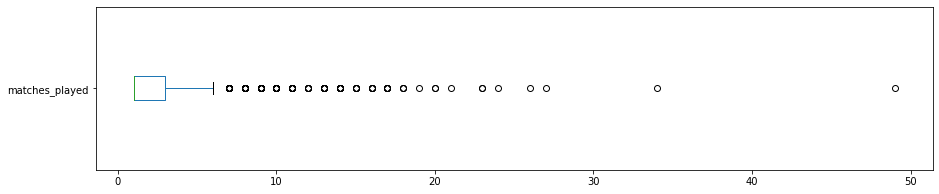

matches_played: valores acima de 30:
2 entradas
0.0972%


In [15]:
# matches_played
df.matches_played.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 para matches_played
print("matches_played: valores acima de 30:")
print("{} entradas".format(len(df[df.matches_played > 30])))
print("{:.4f}%".format((len(df[df.matches_played > 30]) / df.shape[0])*100))

#### Boxplot para death

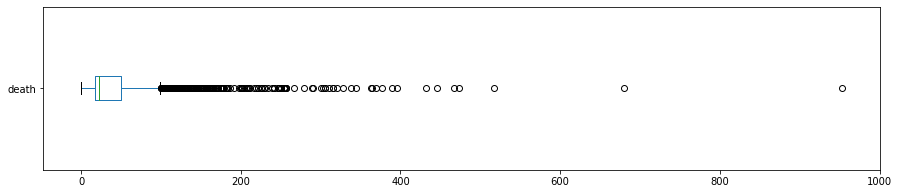


death: valores acima de 600
2 entradas
0.0972%


In [17]:
# death
df.death.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 600 para death
print("\ndeath: valores acima de 600")
print("{} entradas".format(len(df[df.death > 600])))
print("{:.4f}%".format((len(df[df.death > 600]) / df.shape[0])*100))


#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `death` e `matches_played`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

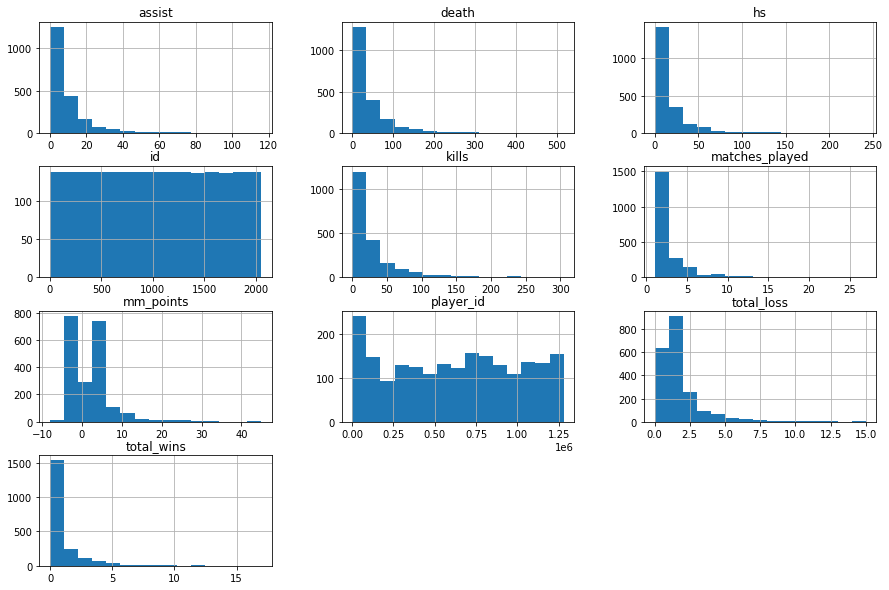

In [19]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.death > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.matches_played > 30].index, axis=0, inplace=True)

# remover is_mm pois está a coluna toda zerada
df_clean.drop('is_mm', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [20]:
# criar uma matriz de correlação
corr = df_clean[['assist', 'kills', 'death', 'hs','total_wins', 'total_loss','mm_points', 'matches_played']].corr()

display(corr)

,assist,kills,death,hs,total_wins,total_loss,mm_points,matches_played
assist,1.000000,0.949972,0.944244,0.901998,0.874939,0.752010,0.716120,0.940413
kills,0.949972,1.000000,0.969241,0.958423,0.898009,0.781314,0.731343,0.970458
death,0.944244,0.969241,1.000000,0.912185,0.841270,0.863922,0.635776,0.982222
hs,0.901998,0.958423,0.912185,1.000000,0.873094,0.709588,0.731178,0.915513
total_wins,0.874939,0.898009,0.841270,0.873094,1.000000,0.505018,0.945859,0.877814
total_loss,0.752010,0.781314,0.863922,0.709588,0.505018,1.000000,0.201967,0.856590
mm_points,0.716120,0.731343,0.635776,0.731178,0.945859,0.201967,1.000000,0.677420
matches_played,0.940413,0.970458,0.982222,0.915513,0.877814,0.856590,0.677420,1.000000


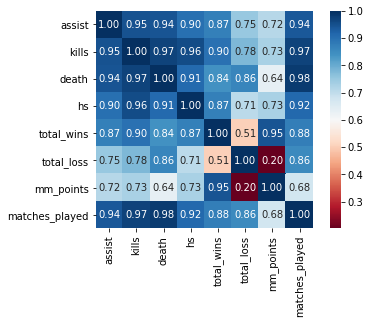

In [21]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Conclusões

Foi feita apenas uma análise superficial na base de dados, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que existem players com poucas partidas jogadas, o que pode distorcer as informações estatísticas de alguns atributos. Além disso pude perceber várias correlações como a quantidade de assistência com a quantidade de kills ou  então a quantidade total de derrotas com a quantidade de death, mas lembrando que correlação não é causa e efeito.

Após feito essa análise, eu sugeriria a empresa uma forma de recompensa para o player, que após X nº de partidas jogadas ele receberia algo em troca, incentivando assim esses players que jogaram apenas 1 vez a jogar mais vezes em busca dessa recompensa.

Por fim, lembra-se que este *dataset* é apenas uma consulta simples no banco de dados fornecido, ideal apenas para uma abordagem inicial.